# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [7]:
srtup=pd.read_csv("C:\\Users\\user\\EXCELR\\Assignments\\Multi Linear Regrerssion\\50_Startups.csv")
srtup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
srtup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
srtup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data=srtup.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MKSP'},axis=1)
data.head(10)

,RDS,Admin,MKSP,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
data.corr()

,RDS,Admin,MKSP,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MKSP,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


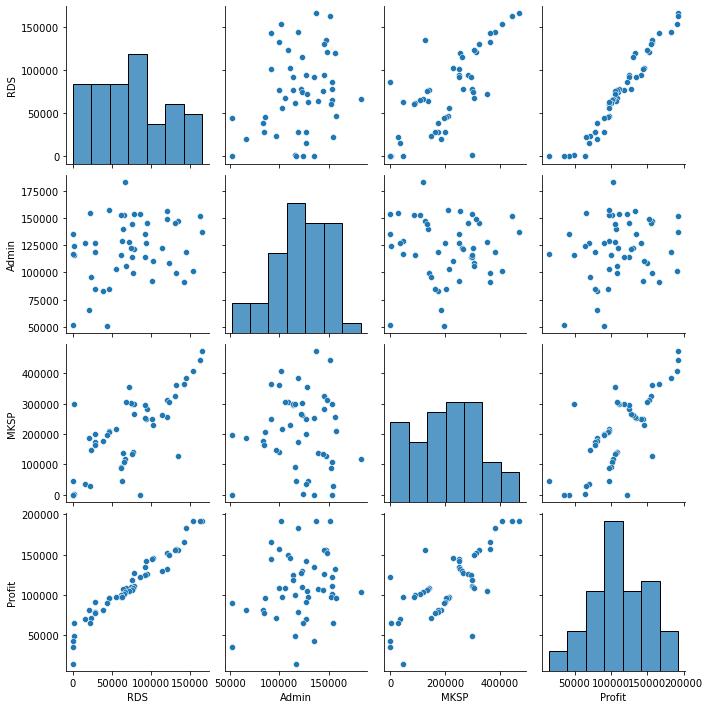

In [12]:
sns.pairplot(data)

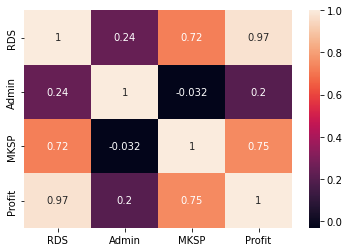

In [13]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
import statsmodels.formula.api as smf
 

In [15]:
model = smf.ols('Profit~RDS+Admin+MKSP',data=data).fit()

model.rsquared

0.9507459940683246

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        23:42:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKSP           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MKSP             0.027228
dtype: float64

In [18]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MKSP          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MKSP         1.047168e-01
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [20]:
ml_Admin=smf.ols('Profit~Admin',data = data).fit()  
print(ml_Admin.tvalues, '\n', ml_Admin.pvalues) 

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [21]:
ml_MKSP=smf.ols('Profit~MKSP',data=data).fit()
print(ml_MKSP.tvalues, '\n', ml_MKSP.pvalues)

Intercept    7.808356
MKSP         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKSP         4.381073e-10
dtype: float64


In [22]:
ml_ADMK=smf.ols('Profit~Admin+MKSP',data=data).fit()
print(ml_ADMK.tvalues,'\n',ml_ADMK.pvalues)

Intercept    1.142741
Admin        2.467779
MKSP         8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
MKSP         9.727245e-11
dtype: float64


In [23]:
rsq_RDS=smf.ols('RDS~Admin+MKSP',data=data).fit().rsquared
vif_RDS=1/(1-rsq_RDS)

rsq_Admin=smf.ols('Admin~RDS+MKSP',data=data).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_MKSP=smf.ols('MKSP~RDS+Admin', data=data).fit().rsquared
vif_MKSP=1/(1-rsq_MKSP)

d1={'Variables':['RDS','Admin','MKSP'],'Vif':[vif_RDS,vif_Admin,vif_MKSP]}
VIF_Frame=pd.DataFrame(d1)
VIF_Frame

,Variables,Vif
0,RDS,2.468903
1,Admin,1.175091
2,MKSP,2.326773


C:\Users\user\EXCELR\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


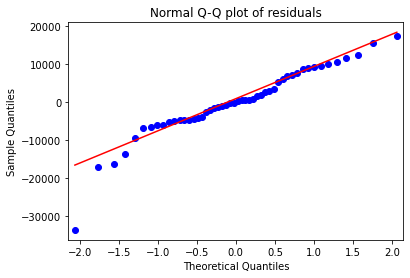

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
def get_stadardized_values( vals):
    return(vals-vals.mean())/vals.std()

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

NameError: name 'get_standardized_values' is not defined

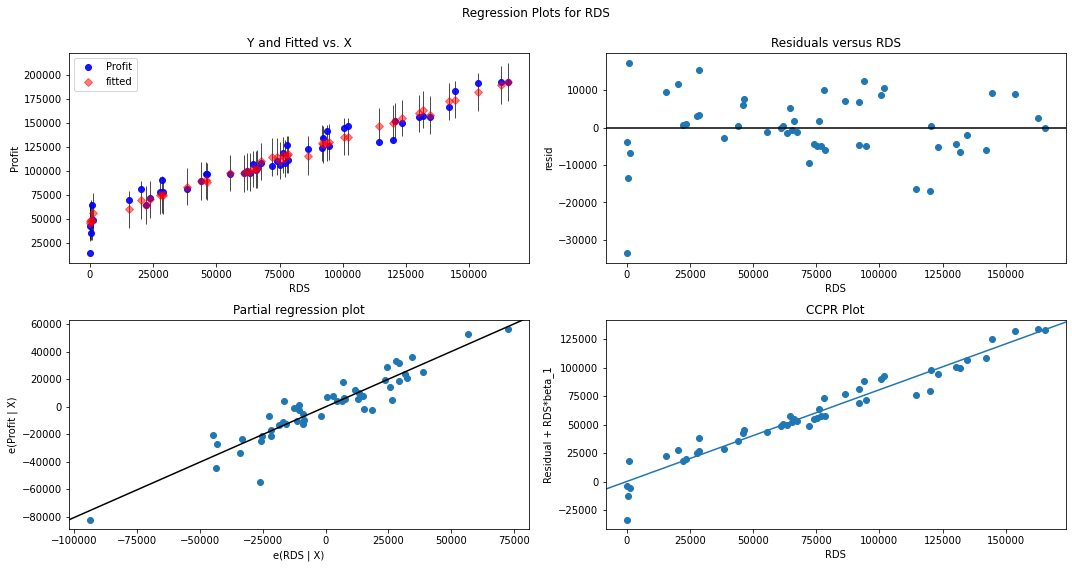

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

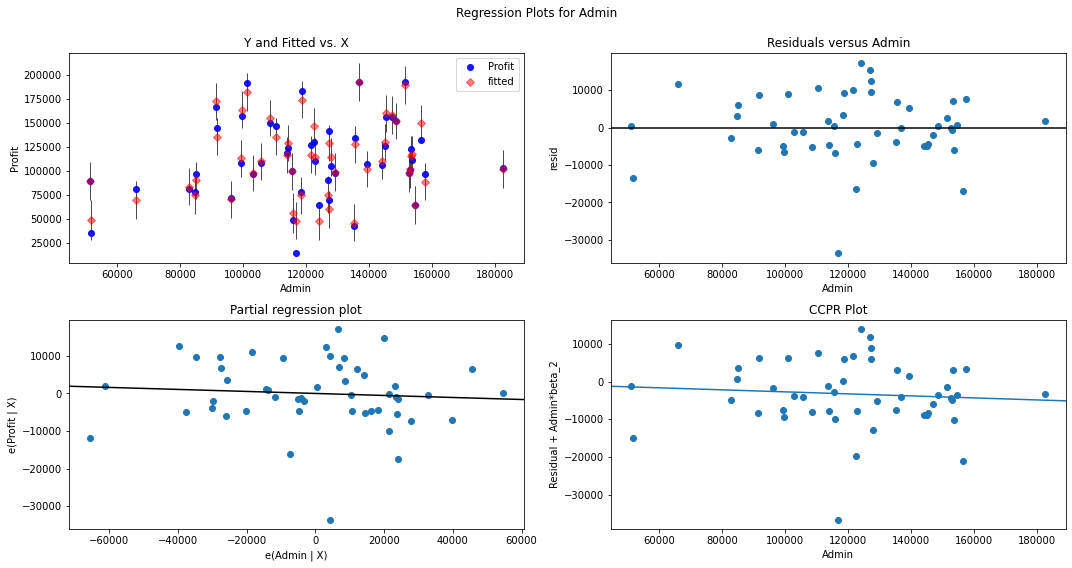

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

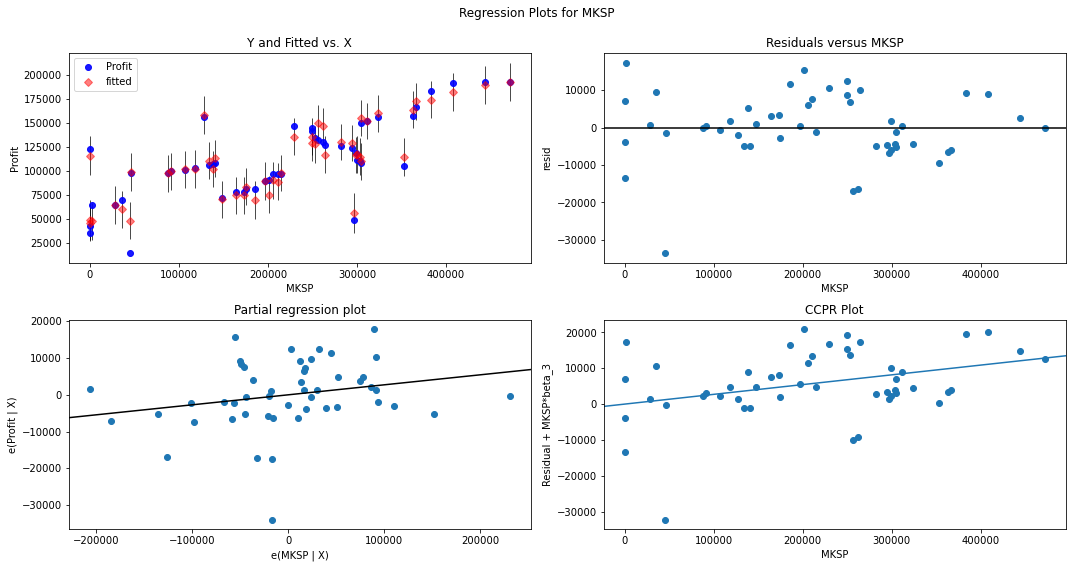

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKSP", fig=fig)
plt.show()

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

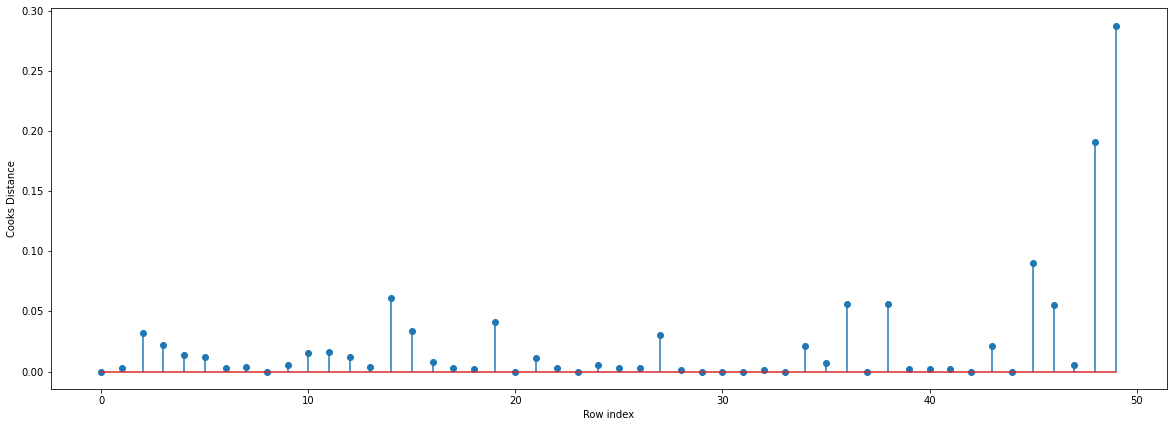

In [31]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

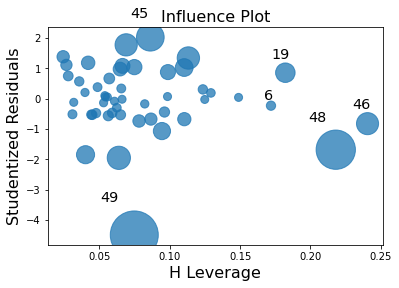

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [35]:
data[data.index.isin([48, 49])]

,RDS,Admin,MKSP,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [36]:
data.head()

,RDS,Admin,MKSP,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [71]:
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1

,RDS,Admin,MKSP,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [72]:
import statsmodels.formula.api as smf
model2=smf.ols("Profit~RDS+Admin+MKSP",data=data1).fit()


In [73]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+Admin+MKSP",data=data1).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data1
    else:
        final_model=smf.ols("Profit~RDS+Admin+MKSP",data=data1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [77]:
test_data=pd.DataFrame({'RDS':50000,"Admin":80000,"MKSP":120000},index=[0])
test_data

,RDS,Admin,MKSP
0,50000,80000,120000


In [78]:
final_model.predict(test_data)

0    89785.010403
dtype: float64

In [79]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [40]:
tc=pd.read_csv('C:\\Users\\user\\EXCELR\\Assignments\\Multi Linear Regrerssion\\ToyotaCorolla.csv',encoding='latin1')
tc.head(10)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [41]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [42]:
tc1=pd.concat([tc.iloc[:,2:4],tc.iloc[:,6:7],tc.iloc[:,8:9],tc.iloc[:,12:14],tc.iloc[:,15:18]],axis=1)
tc1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
tc1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [45]:
tc2=tc1.rename({'Age_08_04':'Age','Quarterly_Tax':'QTX',},axis=1)
tc2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [47]:
tc2[tc2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [48]:
data=tc2.drop_duplicates().reset_index(drop=True)
data

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [49]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTX,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


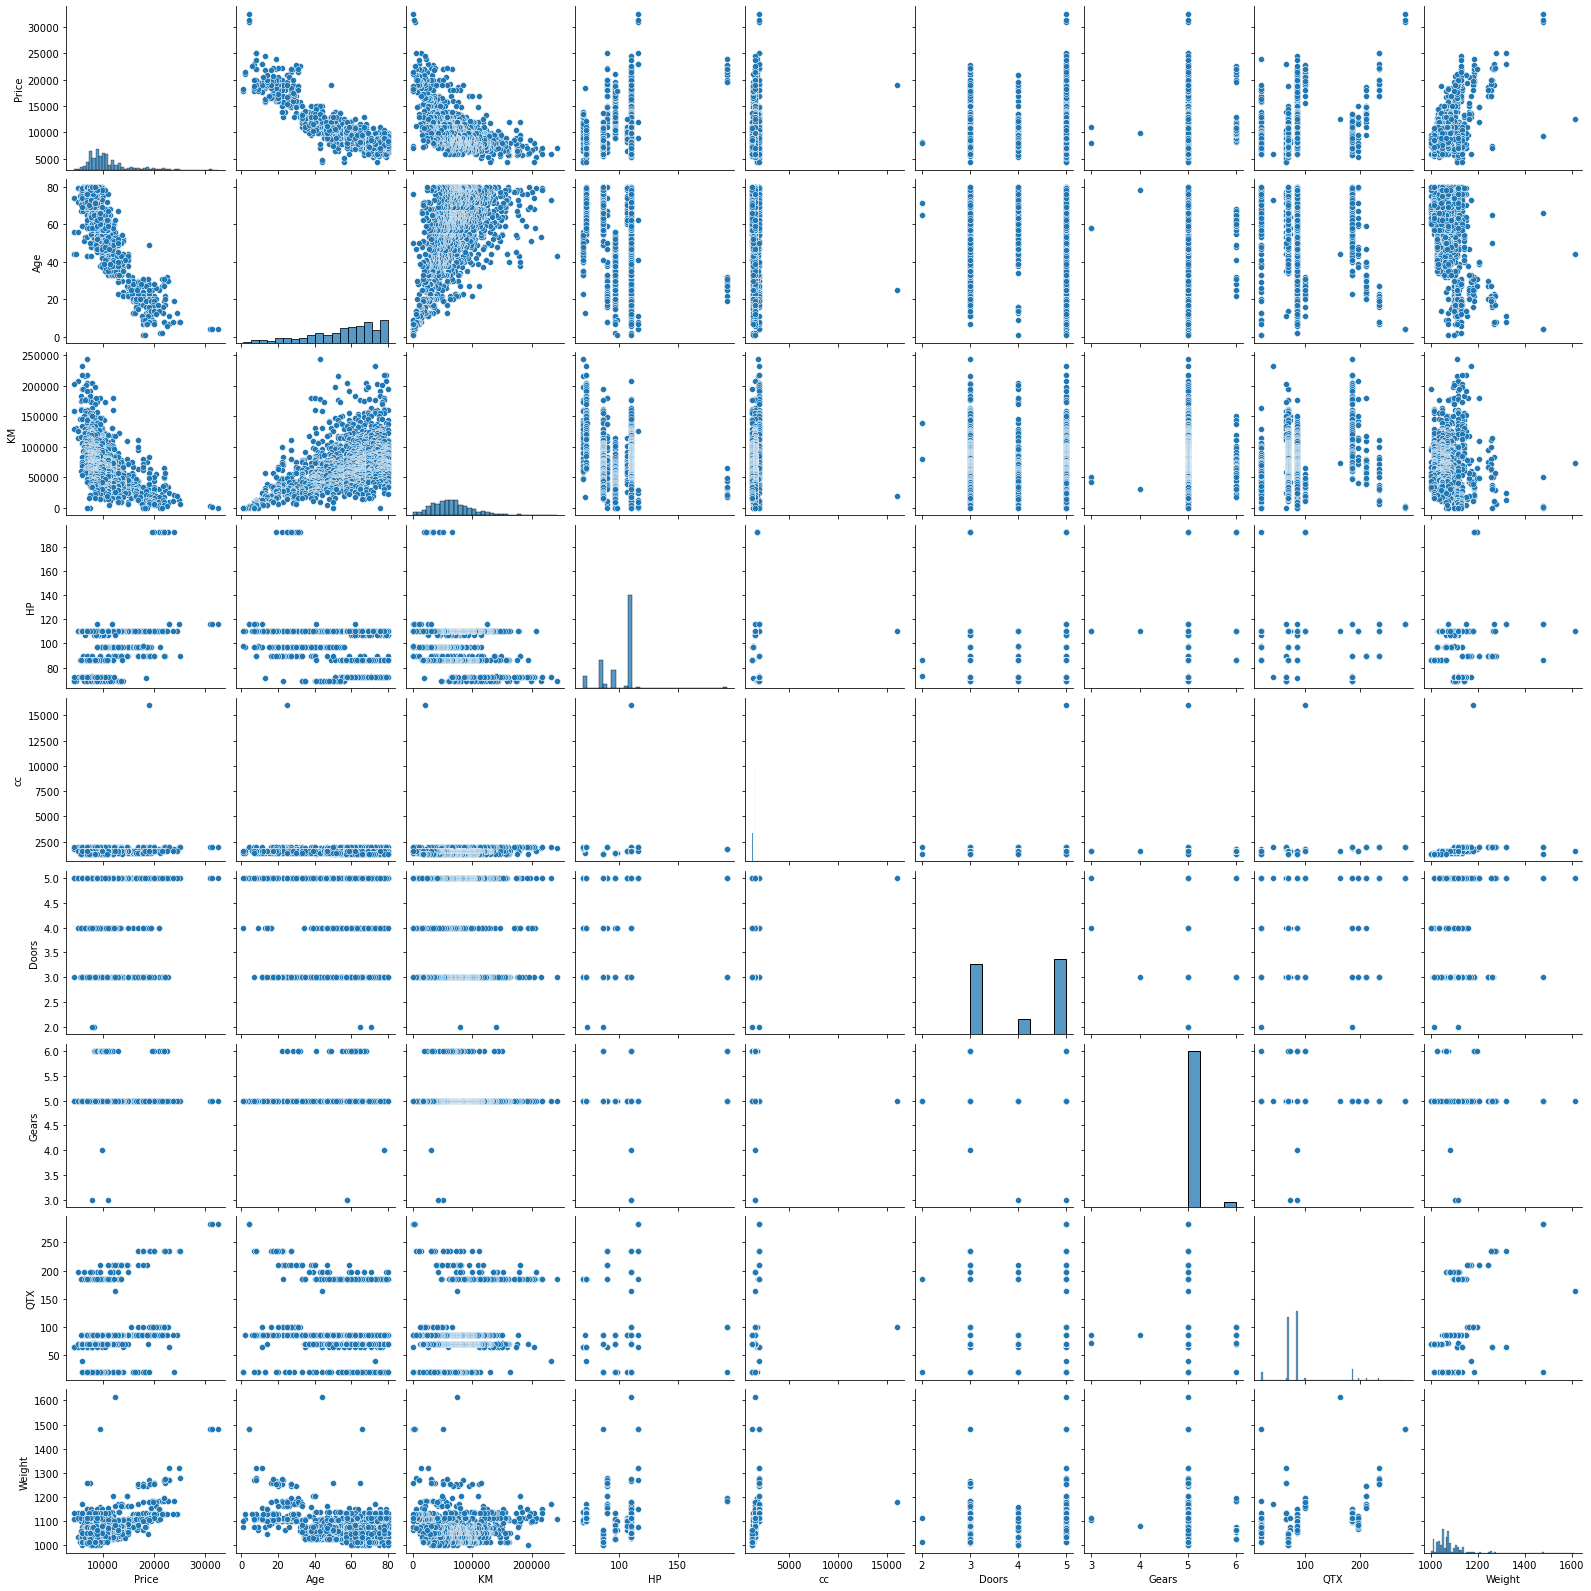

In [50]:
sns.pairplot(data)


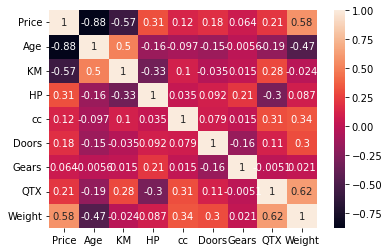

In [51]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [52]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTX+Weight',data=data).fit()

model.rsquared

0.8625200256947

In [53]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTX             3.858805
Weight         16.855470
dtype: float64

In [54]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QTX           2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTX           3.290363e-03
Weight        1.031118e-51
dtype: float64


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:25:26   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTX            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [60]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QTX+Weight',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QTX+Weight',data=data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+QTX+Weight',data=data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QTX+Weight',data=data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+QTX+Weight',data=data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+QTX+Weight',data=data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QTX=smf.ols('QTX~Age+KM+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_QTX=1/(1-rsq_QTX)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QTX',data=data).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QTX','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_GR,vif_QTX,vif_WT]}
VIF_df=pd.DataFrame(d1)
VIF_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTX,2.295375
7,Weight,2.487180


C:\Users\user\EXCELR\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


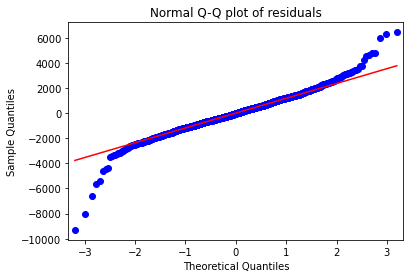

In [62]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

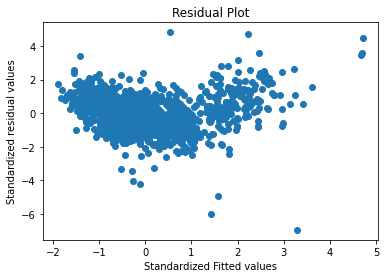

In [64]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

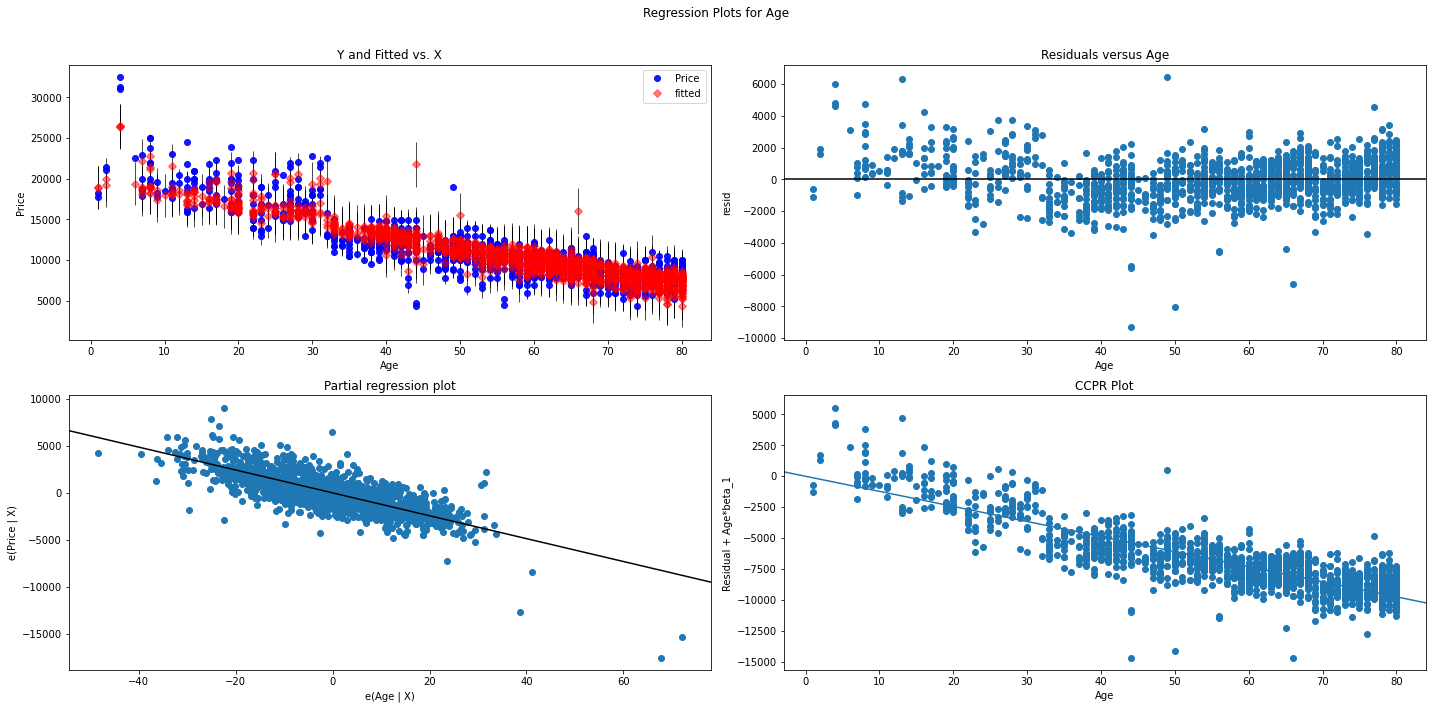

In [65]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

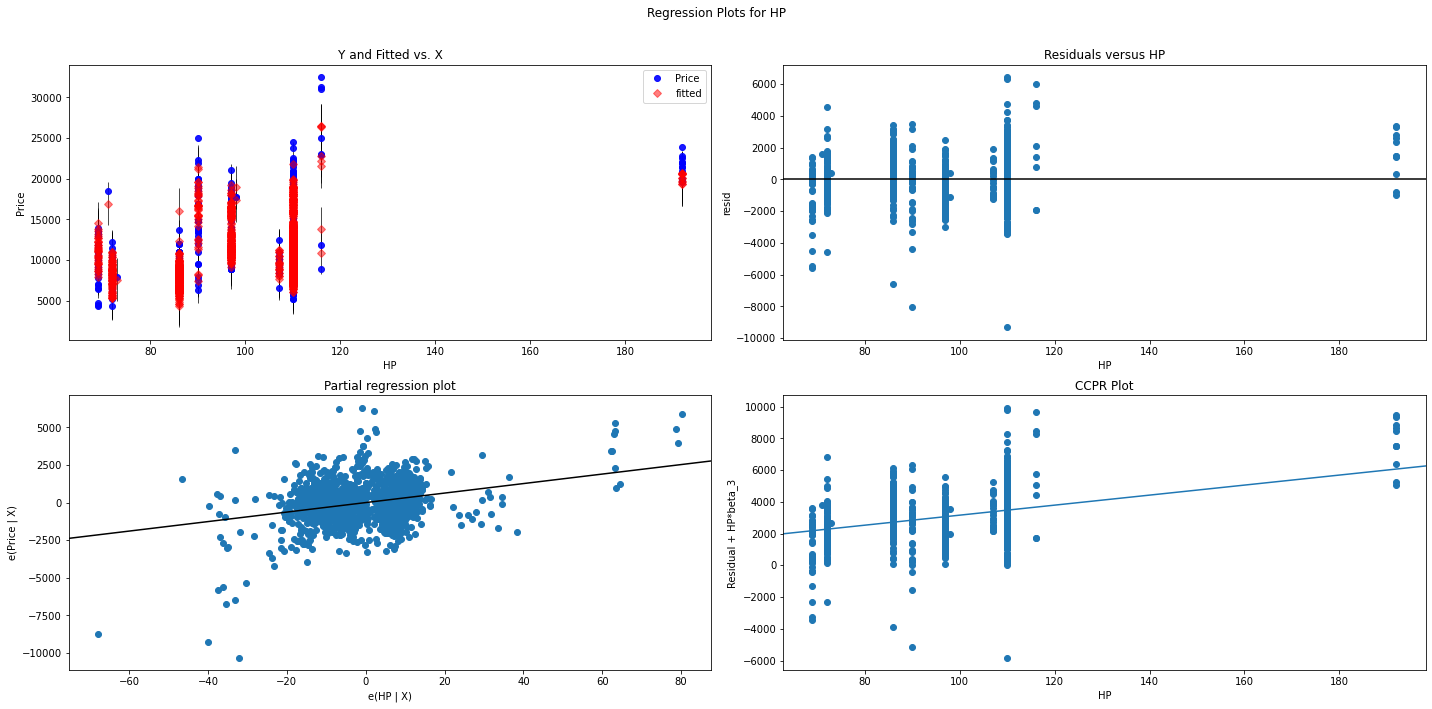

In [66]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

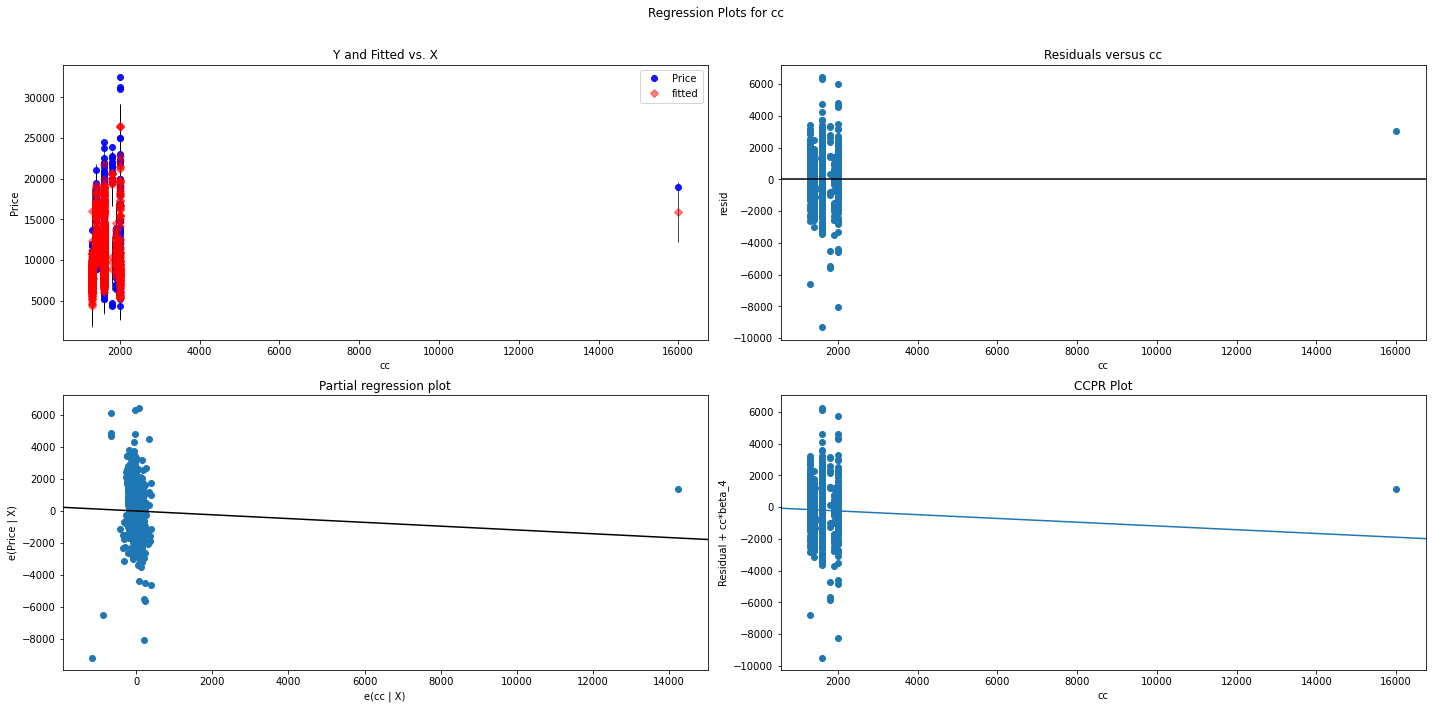

In [67]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

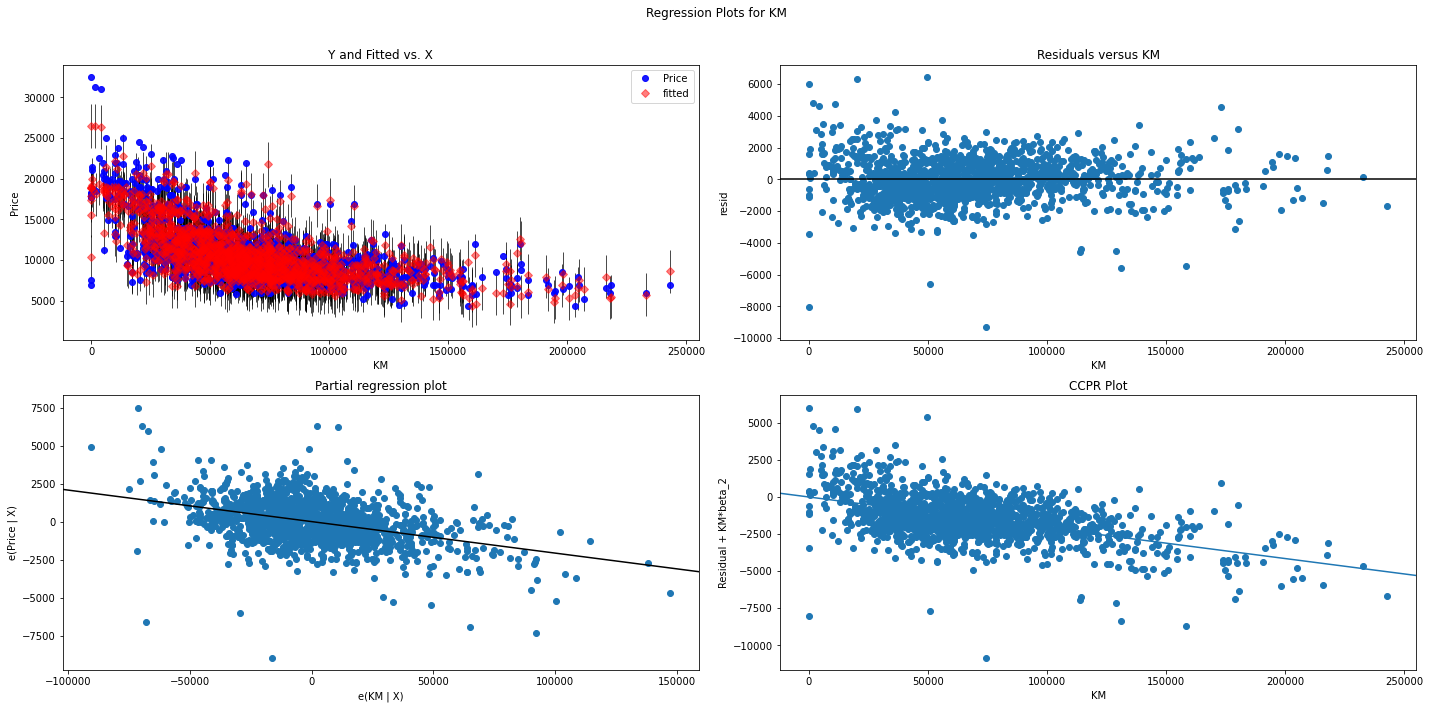

In [68]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

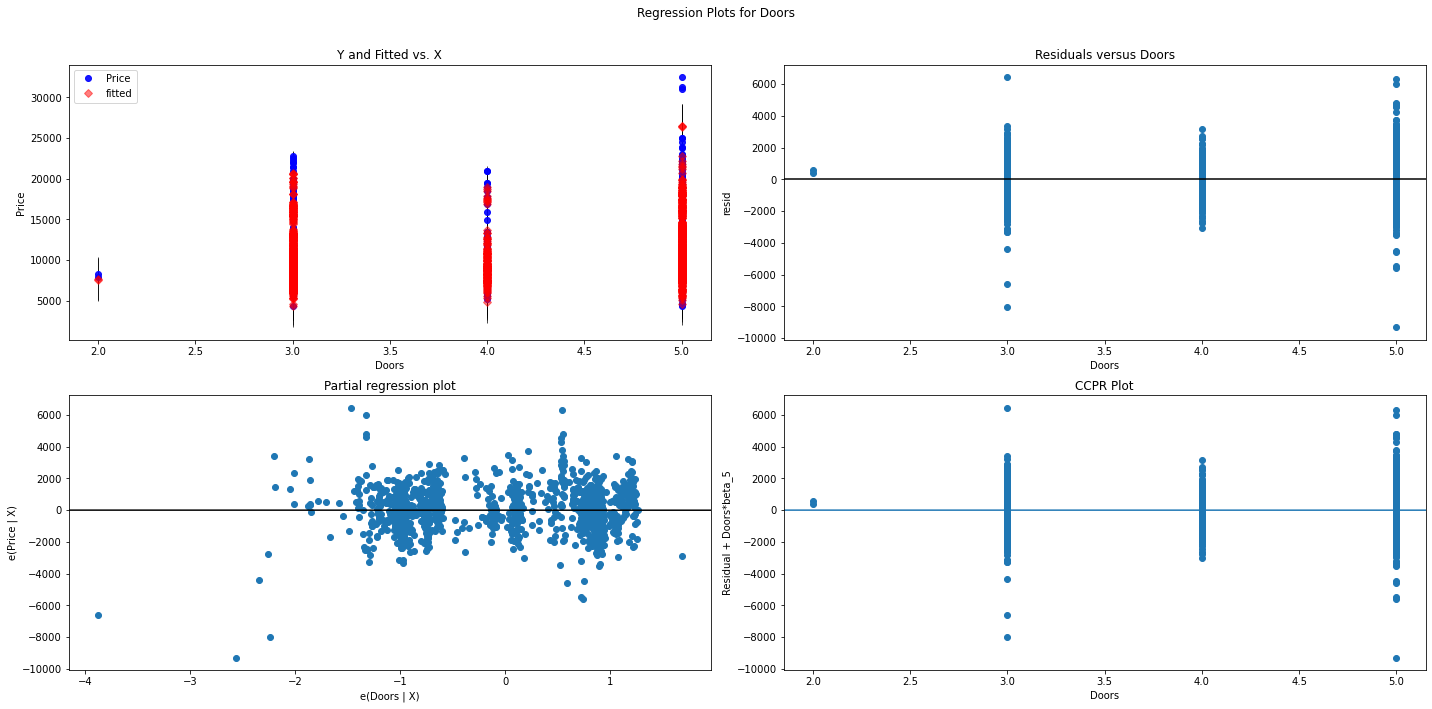

In [69]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

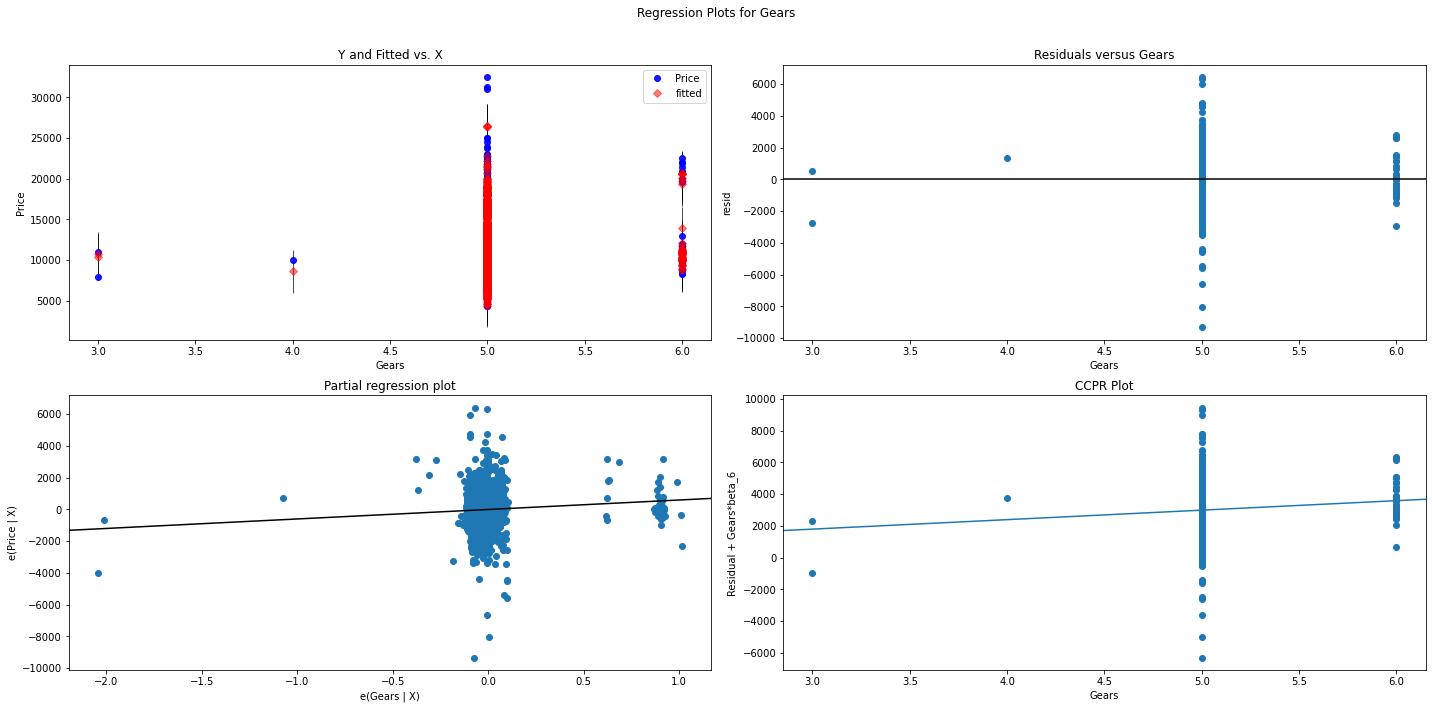

In [70]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

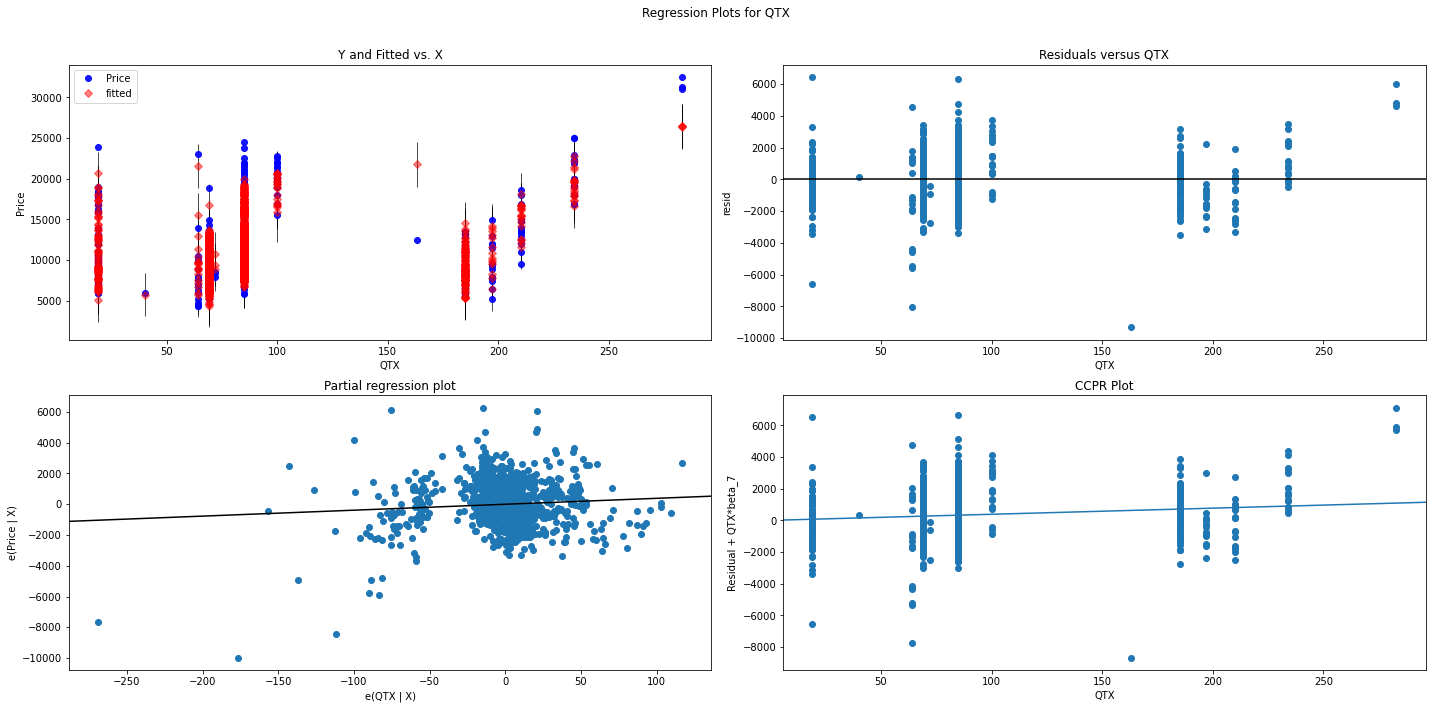

In [71]:
fig=plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'QTX',fig=fig)
plt.show()

In [72]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

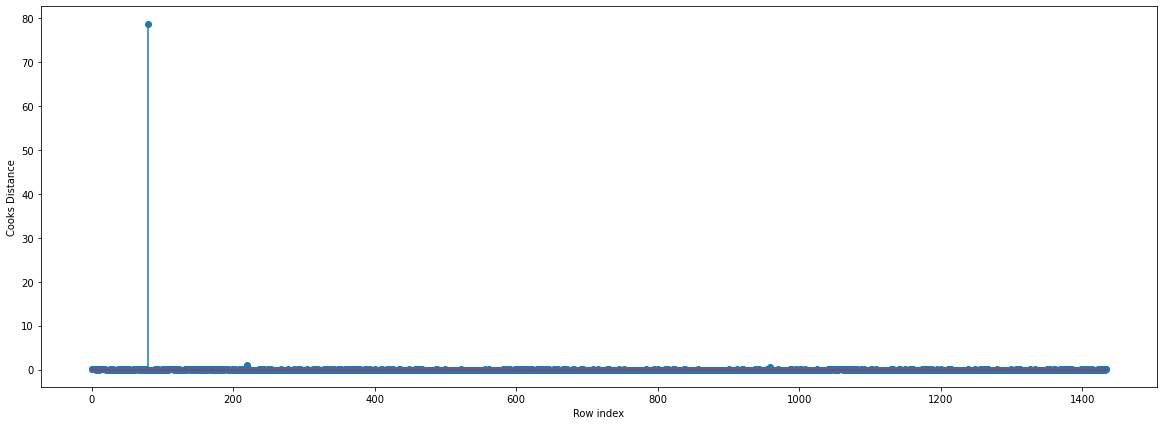

In [74]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

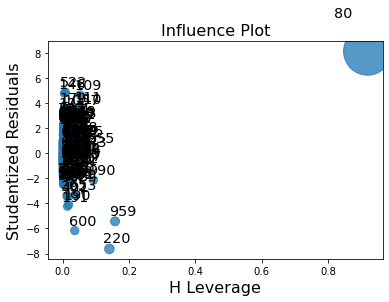

In [76]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [78]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [80]:
data[data.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [81]:
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [82]:
data1=data.copy()
data1

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [85]:

data2=data1.drop(data1.index[[80]],axis=0).reset_index(drop=True)
data2

,Price,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [87]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTX+Weight',data=data2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTX+Weight',data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [88]:
final_model.rsquared 

0.9003762532318559

In [89]:
test_data=pd.DataFrame({'Age':11,"KM":50000,"HP":90,"cc":1500,"Doors":4,"Gears":5,"QTX":80,"Weight":1500},index=[0])
test_data

,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,11,50000,90,1500,4,5,80,1500


In [91]:
final_model.predict(test_data)

0    31893.196598
dtype: float64